# Assignment 2 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Logistic Regression`.


## Instructions
- Do not Use Direct Inbuilt functions for the Task.
- Numpy or other math libraries are allowed.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not change the contents of the Given cells. Use new cells to Write your code.


## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q3.ipynb`
- Fill the Name and Roll number in the below markdown

Name: P Shiridi Kumar<br>
Roll Number: 2021121005

### Dataset

Use the code below to load the Dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)

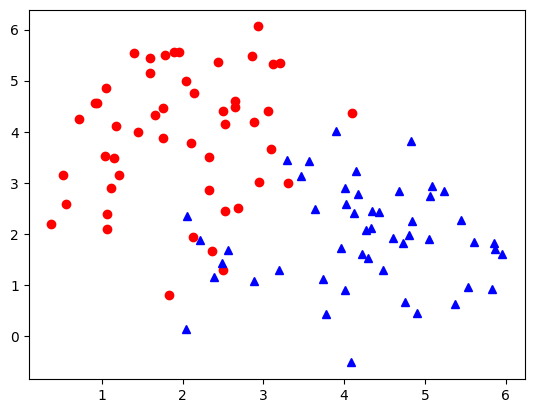

In [3]:
#Visualize dataset 
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')


Write your code below for logistic regression with Gradient Descent and plot the decision boundary.<br>
Sample output is given in the file `LogisticRegression_sample_result.png`

Final parameters :  [ 1.19501034 -1.23294413  0.41451352]


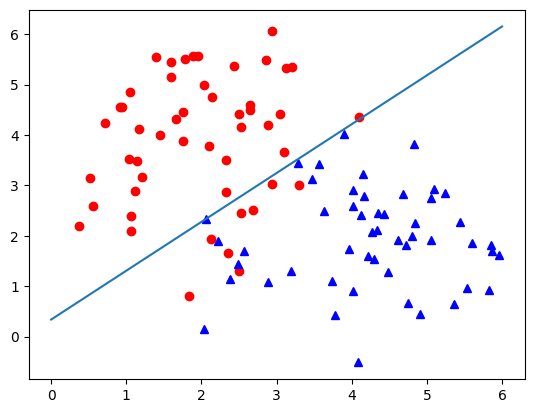

In [9]:
import math
class LogisticRegression:

  def __init__(self,lr,maxiter=1000):
    self.lr=lr
    self.maxiter=maxiter

  def fit(self,xtrain,ytrain):
    self.xtrain=xtrain
    self.ytrain=ytrain
    self.padx()
    params=self.init_params(xtrain)
    self.params=params
    self.GradientDescent()
    return self.params
  
  def getparams(self):
    return self.params
  
  def padx(self):
    bias=np.zeros(len(self.xtrain))
    bias=bias.reshape(len(self.xtrain),1)
    self.xtrain=np.concatenate((self.xtrain,bias),axis=1)

  
  def init_params(self,xtrain):
    params=np.random.randn(len(self.xtrain[0]), 1)
    return params
  
  def calc_loss(pred,act):
    m=len(pred)
    loss=act*(np.log(act)) +(1-act)*(1-np.log(act))
    return sum(loss)/m
  
  def sigmoid(self,x):
    x=1/(1+math.exp(-1*x))
    return x

  def update_weights(self,outputs):
    dz=(outputs-self.ytrain).reshape(-1,1)
    # self.params-=self.lr*sum(self.xtrain*dz).reshape(-1,1)
    self.params[:-1,:]-=self.lr*(1/len(self.xtrain))*sum(self.xtrain[:,:-1]*dz).reshape(-1,1)
    self.params[-1,:]+=self.lr*(1/len(self.xtrain))*sum(dz)


  
  def GradientDescent(self):
    for i in range(self.maxiter):
      h_x=sum((self.xtrain*self.params.T).T)
      g_x=np.array(list(map(lambda x: self.sigmoid(x),h_x)))
      self.update_weights(g_x)


model=LogisticRegression(lr=0.1,maxiter=100)
model.fit(X,y)
params=model.getparams()[:,0]
print("Final parameters : ",params)
def graph(X,y):  
    x = [i for i in range(0,7)]
    "ax1+bx2+c=0 -> x2=-1*(ax1+c)/b"
    plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
    plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')
    y=[-1*(params[0]*x[i]+params[2])/(params[1]) for i in range(len(x))]
    plt.plot(x, y)  
    plt.show()
graph(X,y)



### Questions

1) Explain the approach of Logistic Regression.<br>
2) What is the loss function used?<br>
3) Explain if we can use Mean Square Error(MSE) as Loss function.

A1) The approach followed in logistic regression is gradient optimization i.e, the model will learn a set of weights for a function which best seperates both classes(i.e, the loss is minimum) using gradient descent optimization. At each iteration the weights are updates such that loss is decreased and after some iteration model eventually converges.

A2)The loss function used is log loss = -yi*(h(xi))-(1-yi)*(1-h(xi)) (for one data point) where h(xi) = sigmoid(Wxi) where w = weights and xi is data point . we need to sum up the same for all data points and divide by m(number of data points)

A3)The problem using MSE as loss function is , it is non convex and could lead to local minimum and multiple converging points . where as log loss is convex.
